<a href="https://www.kaggle.com/code/vedatgul/item-based-recommendation-with-movie-dataset?scriptVersionId=124619289" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Item Based Recommendation

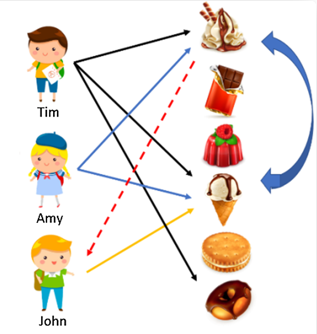

Item based recommendation is a form of collaborative filtering for recommender systems based on the similarity between items calculated using people's ratings of those items.

# <span style="color:#2D7680"> Table of Contents </span>
 [<span style="color:#2D7680">  1. Examine the Dataset </span>](#Exa)
 
 [<span style="color:#2D7680"> 2. Data Preparation </span>](#Dat)
 
 [<span style="color:#2D7680"> 3. Item Based Selection </span>](#Ite)
 
 [<span style="color:#2D7680">  4. Conclusion </span>](#Con)
 
***


##  <span style="color:#2D7680"> 1. Examine the Dataset </span> <a class="anchor" id="Exa"></a>

The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016.
Users were selected at random for inclusion. All selected users had rated at least 20 movies.

**Short explanation of titles from datasets:**

 **movie.csv**

*         movieId – unique movie number
*         title – movie name
*         movieId – unique movie number



 **rating.csv**
    
*         userid – unique user number
*         movieId – unique movie number
*         rating – the rating given to the movie by the user
*         timestamp – movie release date

##  <span style="color:#2D7680"> 2. Data Preparation </span> <a class="anchor" id="Dat"></a>

Step 1: Read movie, rating datasets.

Step 2: Add the movie names and genre of the Ids to the rating data set from the movie data set.

Step3: Keep the names of the films with less than 1000 votes in the list and remove them from the data set.

Step 4: Create a pivot table for the dataframe with the userIDs in the index, the movie names in the columns and the ratings as values.

In [1]:
# Import libraries

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

In [2]:
# Load datasets

movie = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
rating = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")

In [3]:
# Combine two datasets

df = movie.merge(rating, how="left", on="movieId")
df.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.0,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6.0,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8.0,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10.0,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11.0,4.5,2009-01-02 01:13:41


In [4]:
# Set movie unique values

df["title"].nunique()
df["title"].value_counts().head()

Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: title, dtype: int64

In [5]:
# To exclude movies with less than 1000 votes from the dataset

comment_counts = pd.DataFrame(df["title"].value_counts())
rare_movies = comment_counts[comment_counts["title"] <= 1000].index
common_movies = df[~df["title"].isin(rare_movies)]

In [6]:
# Create a pivot table for the dataframe with the userIDs in the index, the movie names in the columns, and the ratings as values

user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")
user_movie_df.head(5)

title   'burbs, The (1989)  (500) Days of Summer (2009)  *batteries not included (1987)  ...And Justice for All (1979)  10 Things I Hate About You (1999)  10,000 BC (2008)  101 Dalmatians (1996)  101 Dalmatians (One Hundred and One Dalmatians) (1961)  102 Dalmatians (2000)  12 Angry Men (1957)  12 Years a Slave (2013)  127 Hours (2010)  13 Going on 30 (2004)  13th Warrior, The (1999)  1408 (2007)  15 Minutes (2001)  16 Blocks (2006)  17 Again (2009)  1984 (Nineteen Eighty-Four) (1984)  2 Days in the Valley (1996)  2 Fast 2 Furious (Fast and the Furious 2, The) (2003)  20,000 Leagues Under the Sea (1954)  200 Cigarettes (1999)  2001: A Space Odyssey (1968)  2010: The Year We Make Contact (1984)  2012 (2009)  2046 (2004)  21 (2008)  21 Grams (2003)  21 Jump Street (2012)  24 Hour Party People (2002)  25th Hour (2002)  27 Dresses (2008)  28 Days (2000)  28 Days Later (2002)  28 Weeks Later (2007)  3 Ninjas (1992)  3-Iron (Bin-jip) (2004)  30 Days of Night (2007)  300 (2007)  3000 Miles to Graceland (2001)  39 Steps, The (1935)  3:10 to Yuma (2007)  40 Days and 40 Nights (2002)  40-Year-Old Virgin, The (2005)  400 Blows, The (Les quatre cents coups) (1959)  42 Up (1998)  48 Hrs. (1982)  50 First Dates (2004)  50/50 (2011)  54 (1998)  6th Day, The (2000)  7th Voyage of Sinbad, The (1958)  8 1/2 (8½) (1963)  8 Heads in a Duffel Bag (1997)  8 Mile (2002)  8MM (1999)  9 (2009)  9 1/2 Weeks (Nine 1/2 Weeks) (1986)  A-Team, The (2010)  A.I. Artificial Intelligence (2001)  AVP: Alien vs. Predator (2004)  AVPR: Aliens vs. Predator - Requiem (2007)  About Last Night... (1986)  About Schmidt (2002)  About a Boy (2002)  Absent-Minded Professor, The (1961)  Absolute Power (1997)  Abyss, The (1989)  Accepted (2006)  Accidental Tourist, The (1988)  Accused, The (1988)  Ace Ventura: Pet Detective (1994)  Ace Ventura: When Nature Calls (1995)  Across the Universe (2007)  Adaptation (2002)  Addams Family Values (1993)  Addams Family, The (1991)  Addicted to Love (1997)  Adjustment Bureau, The (2011)  Adventureland (2009)  Adventures in Babysitting (1987)  Adventures of Baron Munchausen, The (1988)  Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)  Adventures of Milo and Otis, The (Koneko monogatari) (1986)  Adventures of Pinocchio, The (1996)  Adventures of Priscilla, Queen of the Desert, The (1994)  Adventures of Robin Hood, The (1938)  Adventures of Rocky and Bullwinkle, The (2000)  Adventures of Tintin, The (2011)  Aeon Flux (2005)  Affair to Remember, An (1957)  Affliction (1997)  African Queen, The (1951)  After Hours (1985)  Age of Innocence, The (1993)  Agnes of God (1985)  Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)  Air America (1990)  Air Bud (1997)  Air Force One (1997)  Airheads (1994)  Airplane II: The Sequel (1982)  Airplane! (1980)  Airport (1970)  Akira (1988)  Aladdin (1992)  Aladdin and the King of Thieves (1996)  Alexander (2004)  Alfie (2004)  Ali (2001)  Alice in Wonderland (1951)  Alice in Wonderland (2010)  Alien (1979)  Alien Nation (1988)  Alien: Resurrection (1997)  Aliens (1986)  Alien³ (a.k.a. Alien 3) (1992)  Alive (1993)  All About Eve (1950)  All About My Mother (Todo sobre mi madre) (1999)  All Dogs Go to Heaven (1989)  All Dogs Go to Heaven 2 (1996)  All Quiet on the Western Front (1930)  All That Jazz (1979)  All the President's Men (1976)  All the Pretty Horses (2000)  Almost Famous (2000)  Along Came Polly (2004)  Along Came a Spider (2001)  Alphaville (Alphaville, une étrange aventure de Lemmy Caution) (1965)  Altered States (1980)  Always (1989)  Amadeus (1984)  Amateur (1994)  Amazing Spider-Man, The (2012)  Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)  America's Sweethearts (2001)  American Beauty (1999)  American Gangster (2007)  American Gigolo (1980)  American Graffiti (1973)  American History X (1998)  American Hustle (2013)  American Movie (1999)  American Pie (1999)  American Pie 2 (2001)  American President, The (1995)  American Psycho (2000)  American Splendo

##  <span style="color:#2D7680"> 3. Item Based Selection </span> <a class="anchor" id="Ite"></a>

Step 1: Choosing a random user id

Step 2: The id of the movie with the most recent score is taken from the movies that the selected    user gives 5 points.

Step 3: Filters the user_movie_df dataframe created in the User based recommendation section according to the selected movie id

Step 4: Find correlation of selected movie and other movies using filtered dataframe

Step 5: Bring the movie names from the movie dataset and select the first 5 movies to recommend

In [7]:
random_user = int(pd.Series(user_movie_df.index).sample(1, random_state=45).values)
random_user

28941

In [8]:
# The ID of the movie with the highest and most recent vote by the random user

random_user_movie = df[(df["userId"] == random_user) & (df["rating"] == 5)].sort_values(by="timestamp", ascending=False).reset_index()
random_user_movie.head(5)

,index,movieId,title,genres,userId,rating,timestamp
0,126205,7,Sabrina (1995),Comedy|Romance,28941.0,5.0,1996-08-08 14:18:30
1,3559898,534,Shadowlands (1993),Drama|Romance,28941.0,5.0,1996-08-08 14:18:30
2,645900,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,28941.0,5.0,1996-08-08 14:11:36
3,3324609,497,Much Ado About Nothing (1993),Comedy|Romance,28941.0,5.0,1996-08-08 14:08:14
4,3431531,515,"Remains of the Day, The (1993)",Drama|Romance,28941.0,5.0,1996-08-08 14:07:11


In [9]:
first_movie = random_user_movie["title"][0]
first_movie

'Sabrina (1995)'

In [10]:
# Finding correlation of selected movie and other movies using filtered dataframe

movie_item = user_movie_df[first_movie]
recommended = user_movie_df.corrwith(movie_item).sort_values(ascending=False)
recommended.head(5)

title
Sabrina (1995)                1.000000
Intouchables (2011)           0.503128
Father of the Bride (1991)    0.500332
Anna and the King (1999)      0.494133
Runaway Bride (1999)          0.483923
dtype: float64

In [11]:
# Suggesting the top 5 movies other than the selected movie itself

recommended=recommended.reset_index()

recommended.columns = ['movie_name', 'corr']

recommended.sort_values(by="corr", ascending=False, inplace=True)

recommended = recommended.iloc[1: ]

recommended.head(5)

,movie_name,corr
1,Intouchables (2011),0.503128
2,Father of the Bride (1991),0.500332
3,Anna and the King (1999),0.494133
4,Runaway Bride (1999),0.483923
5,"Phantom of the Opera, The (2004)",0.476132


##  <span style="color:#2D7680"> 4. Conclusion  </span> <a class="anchor" id="Con"></a>

The movie with the highest score and the most recent date of the randomly selected user is selected.

The correlation between the selected movie and other movies is calculated

The top five movies with the highest correlation are recommended

 ##  <span style="color:#2D7680"> Keep in Touch!  </span> 

You can follow my the other social media adresses to see this kind of works!

* [GitHub](https://github.com/Vedatgul)
* [LinkedIn](http://www.linkedin.com/in/vedat-gül)
* [Medium](http://medium.com/@veribilimi35)